<a href="https://colab.research.google.com/github/MANDOJU1/Text-Mining/blob/main/07_%EC%84%9C%EC%9A%B8_120_%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 문서 유사도 분석
* 각 단어를 축으로 하는 특성 공간(feature space)에서 문서들을 하나의 위치로 보고 특성 공간 상에서 거리를 이용해 두 문서의 유사성(similarity)을 측정하는 방식
    * 코사인 유사도(cosine similarity) : 두 벡터 간의 각도의 코사인 값을 이용하여 유사도를 계산, 크기가 아닌 방향성에 중점, 벡터의 길이(문서의 길이)에 영향을 받지 않음
    * 유클리드 거리(euclidean distance) : '직선 거리'를 계산, 클러스터링, 위치 기반 서비스, 이미지 처리 등에 사용
    * 맨해튼 거리(Manhattan distance) : 경로의 절대적인 길이를 측정, 격자 형태의 경로를 따라 계산되는 거리 측정 방법
    * 피어슨 유사도 (Pearson Similarity) : 데이터의 평균값에 대한 각 데이터 포인트의 상대적 위치를 기반으로 측정
    * 자카드 유사도(Jaccard similarity) : 두 집합 간의 공통 원소의 비율을 측정

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 6.7 MB/s eta 0:00:00


In [ ]:
# 필요 라이브러리를 로드합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

## 데이터 로드

### 서울특별시 다산콜센터(☎120)의 주요 민원
* 서울특별시 다산콜센터(☎120)의 주요 민원(자주 묻는 질문)에 대한 답변정보
* https://opengov.seoul.go.kr/civilappeal/list

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/seoul-120-text.csv")
df.shape

(2645, 5)

In [ ]:
df.head(2)

,번호,분류,제목,내용,내용번호
0,2645,복지,아빠 육아휴직 장려금,아빠 육아휴직 장려금 업무개요 남성근로자의 육아휴직을 장려하고 양육에 따른 경...,23522464
1,2644,경제,[서울산업진흥원] 서울메이드란?,서울산업진흥원 서울메이드란 서울의 감성을 담은 다양하고 새로운 경험을 제공하기 위해...,23194045


In [ ]:
# 중복데이터가 있는지 확인합니다.
df[df.duplicated()]

,번호,분류,제목,내용,내용번호


In [ ]:
# 결측치를 확인합니다.
df.isnull().sum()

번호      0
분류      0
제목      0
내용      0
내용번호    0
dtype: int64

In [ ]:
# 제목과 내용을 합한 새 컬럼 생성
# 수집할 때 폰트 명이 추가되어서 돋움을 바꿔주는 것

df["제목내용"] = df["제목"] + " " + df["내용"].str.replace("돋움", "")

### 벡터화

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer
tfidfvect = TfidfVectorizer(max_features=2000)  # max_features 안 주면 56,653 개임
tfidfvect

TfidfVectorizer(max_features=2000)

In [ ]:
# 원래는 이렇게 전체 내용을 넣어주지 않고 학습 데이터만 넣어야 되긴 함

dtm = tfidfvect.fit_transform(df['제목내용']) # tfidfvect.fit(df['제목내용']).transform(df['제목내용'])
dtm

<2645x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44024 stored elements in Compressed Sparse Row format>

In [ ]:
# 문장에서 노출되는 feature(특징이 될만한 단어) 수를 합한 변수 Document Term Matrix(이하 dtm)를 생성합니다.
df_dtm_tfidf = pd.DataFrame(dtm.toarray(), columns=tfidfvect.get_feature_names_out())
df_dtm_tfidf.head(3)

,amp,apos,가구,가구의,가급적,가까운,가꾸기,가능,가능하나,가능하도록,...,회의실,횡단보도,효율적으로,후에,후원,훈련,휴관,휴관일,휴무,희망하는
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.055109,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

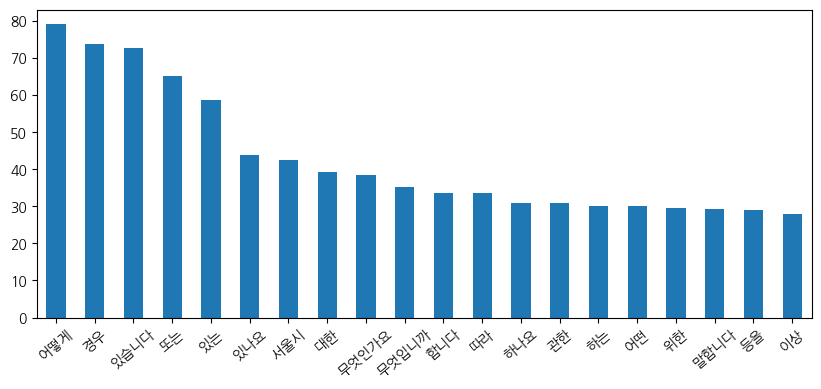

In [ ]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 가중치를 적용한 vector를 확인합니다.
# df_dtm_tfidf
df_dtm_tfidf.sum().nlargest(20).plot(kind="bar", figsize=(10, 4), rot=40)

- 상위 단어들이 '어떻게','어떤', '있나요','무엇입니까' 이런 식의 단어가 많이 잡히는 이유가 120 의 민원이기 때문임

## 코사인 유사도


<img src="https://i.imgur.com/RdPPH33.png">

* 이미지 출처 : https://pyimagesearch.com/

<img src="https://storage.googleapis.com/lds-media/images/cosine-similarity-vectors.original.jpg">

* 이미지 출처 : https://www.learndatasci.com/glossary/cosine-similarity/




- 내적 공간 내에서 두 벡터 사이의 코사인 각도를 구하는 방법( –1∼1 사이 값을 가지며, 1에 가까울수록 유사도가 높음)
- 벡터의 크기가 아닌 방향의 유사도를 판단하는 목적으로 사용
- 두 벡터의 방향이 완전히 같을 경우 1, 90°의 각을 이룰 경우 0, 180°로 완전히 반대 방향인 경우 -1의 값을 갖음
  - **각 데이터 간의 각도가 작을 수록 데이터가 비슷**
- 장점: 어떤 개수의 차원에도 적용할 수 있지만 흔히 다차원의 양수 공간에서의 유사도 측정에서 자주 이용
- 단점: 상호 상관관계를 가지는 특성(키, 몸무게 등)를 갖는 원소들간의 유사도를 계산할때에 성능이 낮음


* **코사인 유사도는 원점(모든 단어의 빈도가 0인 경우)에서 보았을 때 두 문서의 각도에 바탕을 둔 거리 측정 방식**

* 코사인 유사도는 어떤 개수의 차원에도 적용이 가능하여 흔히 다차원의 양수 공간에서의 유사도 측정에 자주 이용된다. 예를 들어 정보 검색 및 텍스트 마이닝 분야에서, 단어 하나 하나는 각각의 차원을 구성하고 문서는 각 단어가 문서에 나타나는 회수로 표현되는 벡터값을 가진다. 이러한 다차원 공간에서 코사인 유사도는 두 문서의 유사를 측정하는 매우 유용한 방법이다.
* 코사인 유사도는 데이터 마이닝 분야에서 클러스터들간의 응집도를 측정하는 방법으로도 사용된다.

* 출처: https://ko.wikipedia.org/wiki/%EC%BD%94%EC%82%AC%EC%9D%B8_%EC%9C%A0%EC%82%AC%EB%8F%84
* API Document: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html



$$ \text{{Cosine Similarity}}(A, B) = \frac{{A \cdot B}}{{\|A\|\|B\|}} = \frac{{\sum^n_{i=1}A_iB_i}}{{\sqrt{\sum^n_{i=1}A_i^2}\sqrt{\sum^n_{i=1}B_i^2}}} $$

In [ ]:
df_dtm_tfidf

In [ ]:
# cosine_similarity : 사이킷 런 코사인 유사도 구해주는 함수

from sklearn.metrics.pairwise import cosine_similarity
cosine_matrix = cosine_similarity(df_dtm_tfidf, df_dtm_tfidf)
cosine_matrix

array([[1.        , 0.        , 0.03860744, ..., 0.01996438, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03860744, 0.        , 1.        , ..., 0.02681782, 0.        ,
        0.        ],
       ...,
       [0.01996438, 0.        , 0.02681782, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.319022  ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.319022  ,
        1.        ]])

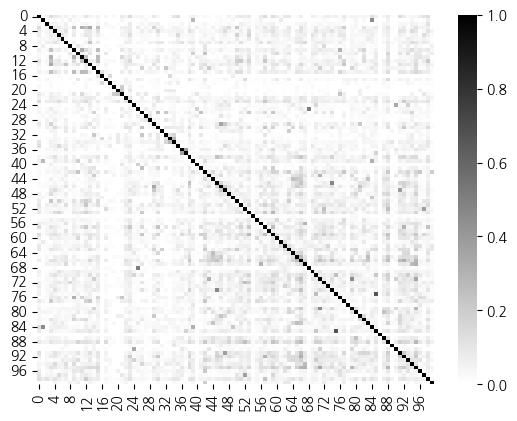

In [ ]:
# heatmap cosine_matrix[:100, :100]
# 검정색일 수록 1에 가깝다 (즉 유사도가 높다)

sns.heatmap(cosine_matrix[:100, :100], cmap="gray_r");

## 유사도가 높은 문서

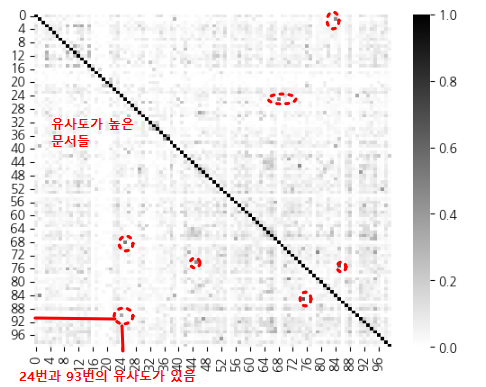

In [ ]:
# df 행의 수가 코사인 매트릭스의 열의 수가 되는

df.shape, cosine_matrix.shape

((2645, 6), (2645, 2645))

In [ ]:
# result_list를 "similarity" 파생변수로 생성하고 유사도가 높은 순으로 정렬합니다.

# 0번째 문서와 제일 유사도가 높은 문서 10개 가져오기

pd.DataFrame(cosine_matrix)[0].nlargest(10)

0       1.000000
1772    0.213216
1073    0.182389
155     0.178752
539     0.168218
1642    0.165228
2252    0.163825
2222    0.161060
141     0.152984
2095    0.152530
Name: 0, dtype: float64

In [ ]:
# 0번째 문서와 제일 유사도가 높은 문서 10 보기
df_consine = df[["번호", "제목"]].copy()
df_consine["similarity_0"] = pd.DataFrame(cosine_matrix)[0]

df_consine.nlargest(10, "similarity_0")

,번호,제목,similarity_0
0,2645,아빠 육아휴직 장려금,1.000000
1772,873,도시계획시설부지 재결신청 이후 진행단계는 어떤 과정을 거칩니까?,0.213216
1073,1572,부기등기 이후 제한물권 설정의 효력은?,0.182389
155,2490,[농업기술센터] 후계농업경영인 선정 및 청년창업형 후계농업경영인 신청 안내,0.178752
539,2106,행려자도 아니고 시설수용자도 아닌 사람이 살고 있던 비닐하우스에서 화상을 입었습니다...,0.168218
1642,1003,"의약품등의 제조업 폐업, 휴업인 경우 구비서류?",0.165228
2252,393,내가 가입되어 있는 보험이 무엇이 있는지 조회할수 있나요?,0.163825
2222,423,장애인을 위한 방송수신기 보급사업,0.161060
141,2504,[농업기술센터] 도시농업전문가양성교육 신청,0.152984
2095,550,서울수화전문교육원,0.152530


## 유사도가 낮은 문서

In [ ]:
# 유사도가 높은 순
df_consine.nsmallest(10, "similarity_0")

,번호,제목,similarity_0
1,2644,[서울산업진흥원] 서울메이드란?,0.0
16,2629,등록된 법인의 지점이나 사업소는 별도로 등록해야 시공이 가능한가요 ?,0.0
20,2625,ESCO사업의 주요 사업분야에는 어떤게 있나요?,0.0
31,2614,3.1절 나라사랑 기념행사,0.0
32,2613,궁동체육관 FAQ,0.0
44,2601,서울 도시농업 사진전,0.0
67,2578,찾아가는 청소년 거리상담 서울시연합아웃리치,0.0
68,2577,태양광 시민펀드,0.0
90,2555,동북아 대기질개선 국제 포럼,0.0
99,2546,[건강가정지원센터] 서울가족학교 예비부부교실,0.0


### 유사도가 높은 문서 찾는 함수
- 특정 문서에 대한 유사도가 높은 걸 계속 찾아야 하니까

In [ ]:
def find_similarity(idx, n=10):
    """유사도가 높은 문서를 반환"""
    df_consine = df[["번호", "제목"]].copy()
    df_consine[f"similarity_{idx}"] = pd.DataFrame(cosine_matrix)[idx]
    return df_consine.nlargest(n, f"similarity_{idx}")

In [ ]:
find_similarity(25)

,번호,제목,similarity_25
25,2620,아파트 태양광 설치 및 에너지절약 활성화 포럼,1.000000
1158,1487,북아현2 재정비촉진구역 아파트 신축 건축규모는?,0.556603
68,2577,태양광 시민펀드,0.505706
464,2181,장지천 태양광 가로등은 무엇인가요?,0.408181
706,1939,마천국민임대주택내 일반분양 아파트 있습니까?,0.345281
2350,295,아파트 진입도로는 몇 미터이상을 확보하여야 하나요?,0.323326
1835,810,아파트 단지내 테니스장을 배드민턴장 등 유사 운동시설로 변경이 가능한지요?,0.287807
286,2359,부분임대아파트란?,0.287017
1826,819,"관내현황(인구, 주택수)",0.286618
1119,1526,아파트 관리사무소장으로 재직 중 명예훼손죄로 벌금형을 선고받는 경우 자격취소 사유가...,0.285939


- 유사도가 높은 걸 알아내면 유사한 콘텐츠를 추천할 수 있음
- 제품 추천, 영화 추천, 내가 참고해보려고 하는 정보와 비슷한 내용이 있는지 확인
- **코사인 유사도가 문서의 길이에 영향을 받지 않기 때문에 가장 널리 이용되는 유사도 방법**

## 유클리드 유사도

- 유클리드 거리(Euclidean distance)는 **두 점 사이의 거리를 계산**할 때 흔히 쓰는 방법
- 유클리드 공간에서의 기하학적 최단 거리(직선 거리) >> 유클리드 거리의 값이 가장 작다는 것은 문서 간 거리가 가장 가깝다는 것을 의미
- 장점: 계산하기 쉬움
- 단점: 결과 값이 1보다 큰 값이 나올 수 있으므로 값을 제한하는 과정이 필요, 분포가 다르거나 범위가 다른 경우에 상관성을 놓침
- 유클리드 거리는 두 벡터 간의 직선 거리를 계산하는 방법으로, 텍스트 데이터에 대해서는 코사인 유사도보다 덜 효과적일 수 있습니다.
- **텍스트의 차원이 높거나 데이터가 희소할 경우, 유클리드 거리는 유용한 정보를 제공하기 어려울 수 있음 => 텍스트 데이터에 대한 유사도 측정에는 코사인 유사도 또는 다른 방법을 고려**.

<br>

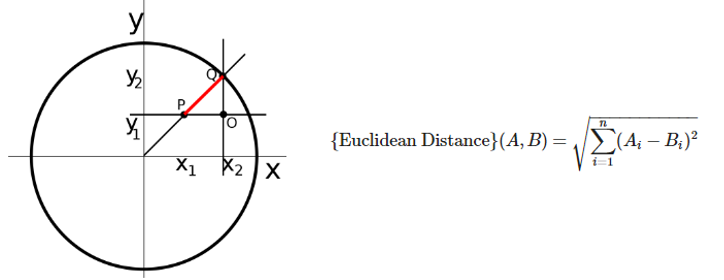


* [참고] 내적 구하기

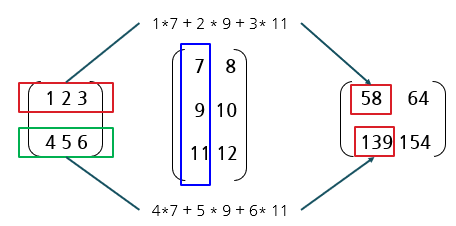

In [ ]:
# 유클리디안 방식에서는 행렬 내적을 이용
# dot()

# dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))

help(euclidean_distances)

Help on function euclidean_distances in module sklearn.metrics.pairwise:

euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)
    Compute the distance matrix between each pair from a vector array X and Y.
    
    For efficiency reasons, the euclidean distance between a pair of row
    vector x and y is computed as::
    
        dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
    
    This formulation has two advantages over other ways of computing distances.
    First, it is computationally efficient when dealing with sparse data.
    Second, if one argument varies but the other remains unchanged, then
    `dot(x, x)` and/or `dot(y, y)` can be pre-computed.
    
    However, this is not the most precise way of doing this computation,
    because this equation potentially suffers from "catastrophic cancellation".
    Also, the distance matrix returned by this function may not be exactly
    symmetric as required by, e.g., ``scipy.spatial

In [ ]:
# sklearn.metrics.pairwise에서 euclidean_distances 불러오기
# 유사도값을 0~1로 만들기
#     dist(x, y) = sqrt(dot(x, x) - 2 * dot(x, y) + dot(y, y))
from sklearn.metrics.pairwise import euclidean_distances

# help(euclidean_distances)
ed_similarity = euclidean_distances(df_dtm_tfidf, df_dtm_tfidf)
ed_similarity.shape

(2645, 2645)

In [ ]:
# 최소, 최댓값 확인
# 거리를 구하기 때문에 거리가 작을 수록 유사도가 높다

ed_similarity.min(), ed_similarity.max()

(0.0, 1.4142135623730956)

<Axes: >

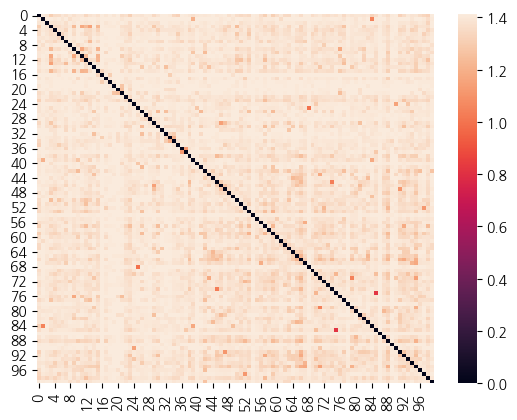

In [ ]:
# heatmap (속도가 오래 걸리니 100*100 정도를 추천합니다.)

sns.heatmap(ed_similarity[:100, :100])
# sns.heatmap(ed_similarity[:100, :100], cmap="gray")

- 0에 가까울수록 유사도가 높은 것임

In [ ]:
# 코사인 유사도처럼 1에 가까운 유사도 개념으로 보려면 아래처럼 변경

# [첫번째 시도]
# 결과는 대각선 값이 0 임(자기 자신이니까)
# 근데 코사인 유사도처럼 자기 자신일때는 1로 나오게 하려면

# ed_matrix = ed_similarity / ed_similarity.max()
# ed_matrix[:10, :10].round(2)


# [두번째 시도]
ed_matrix = 1 - (ed_similarity / ed_similarity.max())
ed_matrix[:10, :10].round(2)

array([[1.  , 0.  , 0.02, 0.07, 0.04, 0.04, 0.01, 0.03, 0.01, 0.03],
       [0.  , 1.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.03, 0.01],
       [0.02, 0.  , 1.  , 0.02, 0.02, 0.02, 0.01, 0.03, 0.  , 0.01],
       [0.07, 0.  , 0.02, 1.  , 0.04, 0.04, 0.02, 0.03, 0.01, 0.13],
       [0.04, 0.01, 0.02, 0.04, 1.  , 0.03, 0.02, 0.06, 0.  , 0.03],
       [0.04, 0.  , 0.02, 0.04, 0.03, 1.  , 0.05, 0.03, 0.  , 0.04],
       [0.01, 0.02, 0.01, 0.02, 0.02, 0.05, 1.  , 0.02, 0.  , 0.01],
       [0.03, 0.  , 0.03, 0.03, 0.06, 0.03, 0.02, 1.  , 0.01, 0.03],
       [0.01, 0.03, 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 1.  , 0.01],
       [0.03, 0.01, 0.01, 0.13, 0.03, 0.04, 0.01, 0.03, 0.01, 1.  ]])

<Axes: >

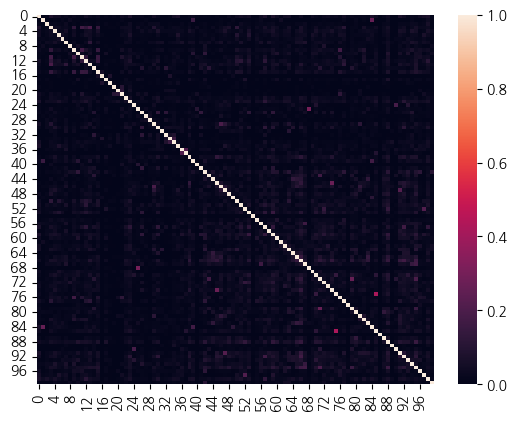

In [ ]:
# heatmap (속도가 오래 걸리니 100*100 정도를 추천합니다.)
# 밝을수록 유사도가 있는 상태임

sns.heatmap(ed_matrix[:100, :100])
# sns.heatmap(ed_matrix[:100, :100], cmap="gray")

### 유사도가 높은 문서를 반환하는 함수 만들기

In [ ]:
# find_similarity_idx 함수 작성 - 아까 만든 함수 복사 후 변경(다른 유사도 구하는 방식에서도 사용 가능하도록)

def find_similarity_idx(idx, sim_matrix, n=10):
    """유사도가 높은 문서를 반환"""
    df_sim = df[["번호", "제목"]].copy()
    df_sim[f"similarity_{idx}"] = pd.DataFrame(sim_matrix)[idx]
    return df_sim.nlargest(n, f"similarity_{idx}")

In [ ]:
# 위에서 코사인유사도와 비교해보기

find_similarity_idx(25, ed_matrix)

,번호,제목,similarity_25
25,2620,아파트 태양광 설치 및 에너지절약 활성화 포럼,1.000000
1158,1487,북아현2 재정비촉진구역 아파트 신축 건축규모는?,0.334119
68,2577,태양광 시민펀드,0.296940
428,2217,근저당권자는 누구입니까?,0.292893
538,2107,용답동의 여자 인구는 몇 명인가요?,0.292893
579,2066,공중에 띄우는 애드벌룬은 신고대상인지?,0.292893
591,2054,"아취광고물은 허가대상입니까, 신고대상입니까?",0.292893
636,2009,행정처분을 받은자의 교육시간은?,0.292893
655,1990,보도1㎡를포장하는데몇개가소요되나요?,0.292893
657,1988,수색동의 수색의 한자는 무슨자를 쓰나요?,0.292893


- 제대로 결과가 안 나옴

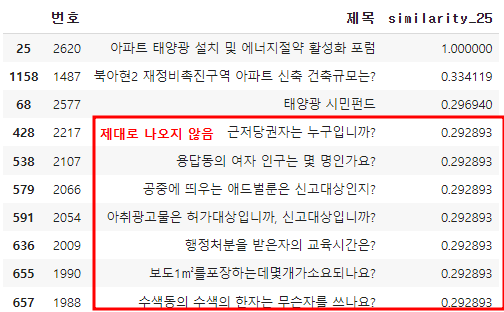

## 피어슨 유사도

- 두 벡터가 주어졌을 때의 **상관관계**를 계산하며 각 벡터의 표본평균으로 정규화하고, 코사인 유사도를 산출하면 피어슨 유사도
- 피어슨 유사도가 1이면 양의 상관관계, -1이면 음의 상관관계, 0이면 상관관계가 없음(독립)을 의미
- 장점: 양적 변수들 사이의 선형관계를 확인하기 쉬움. 코사인 유사도의 평점 부분에 각 유저의 평균값을 뺀 값 확인 가능
- 단점: 코사인 유사도와 마찬가지로 벡터가 지닌 스칼라들의 값의 크기에 대한 고려를 하지 않음

In [ ]:
# np.corrcoef(np 의 코이피션트)
# nan 으로 나눈 것 때문에 오류 메세지 나오나 무시

pearson_sim = np.corrcoef(df_dtm_tfidf, df_dtm_tfidf)
pearson_sim

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[ 1.        , -0.007145  ,  0.02998117, ...,  0.01105423,
        -0.0094757 , -0.00589594],
       [-0.007145  ,  1.        , -0.00444795, ..., -0.00449631,
        -0.00467592, -0.00290944],
       [ 0.02998117, -0.00444795,  1.        , ...,  0.02129766,
        -0.00589887, -0.00367037],
       ...,
       [ 0.01105423, -0.00449631,  0.02129766, ...,  1.        ,
        -0.00596301, -0.00371028],
       [-0.0094757 , -0.00467592, -0.00589887, ..., -0.00596301,
         1.        ,  0.31653505],
       [-0.00589594, -0.00290944, -0.00367037, ..., -0.00371028,
         0.31653505,  1.        ]])

In [ ]:
# nan 이 있는 상태이기에 min(), max() 는 nan 으로 나옴
pearson_sim.min(), pearson_sim.max()

(nan, nan)

In [ ]:
# nan 을 제외한다면 다른 값들은 문제 없음

pearson_sim[:10, :10]

array([[ 1.        , -0.007145  ,  0.02998117,  0.13132428,  0.06876288,
         0.06351726,  0.0133573 ,  0.04742516,  0.00771254,  0.04282372],
       [-0.007145  ,  1.        , -0.00444795, -0.00704035,  0.01478903,
        -0.0076387 ,  0.02650838, -0.00684132,  0.0620877 ,  0.00758098],
       [ 0.02998117, -0.00444795,  1.        ,  0.02520446,  0.03633173,
         0.02270414,  0.0090217 ,  0.05612094, -0.00507435,  0.01410659],
       [ 0.13132428, -0.00704035,  0.02520446,  1.        ,  0.06460435,
         0.05504576,  0.033615  ,  0.04368266,  0.01695018,  0.22412563],
       [ 0.06876288,  0.01478903,  0.03633173,  0.06460435,  1.        ,
         0.03839007,  0.03560174,  0.09743454, -0.00831906,  0.04800388],
       [ 0.06351726, -0.0076387 ,  0.02270414,  0.05504576,  0.03839007,
         1.        ,  0.08765638,  0.03669509, -0.00201258,  0.06266443],
       [ 0.0133573 ,  0.02650838,  0.0090217 ,  0.033615  ,  0.03560174,
         0.08765638,  1.        ,  0.02281683

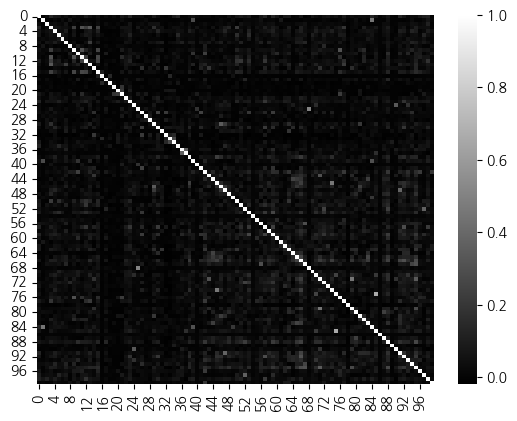

In [ ]:
# heatmap
sns.heatmap(pearson_sim[:100, :100], cmap="gray");

In [ ]:
# find_similarity_idx
def find_similarity_idx(idx, sim_matrix, n=10):
    """유사도가 높은 문서를 반환"""
    df_sim = df[["번호", "제목"]].copy()
    df_sim[f"similarity_{idx}"] = pd.DataFrame(sim_matrix)[idx]
    return df_sim.nlargest(n, f"similarity_{idx}")

In [ ]:
# 0 번 문서 유사도 보기

# find_similarity_idx(0, pearson_sim)

# 25번 문서는 코사인유사도와 동일한 결과가 나옴
find_similarity_idx(25, pearson_sim)

,번호,제목,similarity_25
25,2620,아파트 태양광 설치 및 에너지절약 활성화 포럼,1.000000
1158,1487,북아현2 재정비촉진구역 아파트 신축 건축규모는?,0.556889
68,2577,태양광 시민펀드,0.504393
464,2181,장지천 태양광 가로등은 무엇인가요?,0.403266
706,1939,마천국민임대주택내 일반분양 아파트 있습니까?,0.342941
2350,295,아파트 진입도로는 몇 미터이상을 확보하여야 하나요?,0.319647
1826,819,"관내현황(인구, 주택수)",0.284566
1835,810,아파트 단지내 테니스장을 배드민턴장 등 유사 운동시설로 변경이 가능한지요?,0.283055
1119,1526,아파트 관리사무소장으로 재직 중 명예훼손죄로 벌금형을 선고받는 경우 자격취소 사유가...,0.282674
286,2359,부분임대아파트란?,0.281262


## 자카드 유사도

* 자카드 지수(Jaccard index)는 두 집합 사이의 유사도를 측정하는 방법 중 하나.
- 자카드 계수(Jaccard coefficient) 또는 자카드 유사도(Jaccard similarity)라고도 한다.
  - 자카드 지수는 0과 1 사이의 값을 가지며, 두 집합이 동일하면 1의 값을 가지고, 공통의 원소가 하나도 없으면 0의 값을 가진다.
- 두 문장을 각 단어의 집합으로 생성 한 뒤, 생성된 집합을 통해 유사도를 측정(고객 간 유사도)
- 0,1의 바이너리 데이터로 만든 이후에, 합집합과 교집합 사이의 비율로 나타냄(집합의 개념을 이용)
- **얼마나 많은 아이템을 동시에 갖고 있는가?를 수치로 환산하며, 함께 갖고 있는 아이템이 없다면 0, 아이템 전체가 겹치면 1로 계산**
- 장점: 대표적인 이진 평가(binary feedback)에 대한 유사도를 측정할 수 있는 지표, 동시출현빈도(co-occurrence) 고려
- 단점: 데이터가 순서나 양을 갖는 집합 데이터라면 낮은 성능을 보임


<img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/Intersection_over_Union_-_visual_equation.png" width="500">

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Intersection_over_Union_-_poor%2C_good_and_excellent_score.png" width="500">



$$ \text{{Jaccard Similarity}}(A, B) = \frac{{|A \cap B|}}{{|A \cup B|}} $$

In [ ]:
# sklearn.metrics.pairwise 에서 pairwise_distances 불러오기
from sklearn.metrics.pairwise import pairwise_distances

jaccard_matrix = pairwise_distances(dtm.toarray(), dtm.toarray(), metric="jaccard")
jaccard_matrix[:10, :10].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


array([[0.  , 1.  , 0.93, 0.86, 0.95, 0.92, 0.95, 0.94, 0.98, 0.95],
       [1.  , 0.  , 1.  , 1.  , 0.98, 1.  , 0.95, 1.  , 0.93, 0.99],
       [0.93, 1.  , 0.  , 0.91, 0.93, 0.91, 0.92, 0.86, 1.  , 0.94],
       [0.86, 1.  , 0.91, 0.  , 0.93, 0.9 , 0.97, 0.95, 0.97, 0.9 ],
       [0.95, 0.98, 0.93, 0.93, 0.  , 0.93, 0.92, 0.91, 1.  , 0.93],
       [0.92, 1.  , 0.91, 0.9 , 0.93, 0.  , 0.91, 0.95, 0.99, 0.89],
       [0.95, 0.95, 0.92, 0.97, 0.92, 0.91, 0.  , 0.95, 0.97, 0.95],
       [0.94, 1.  , 0.86, 0.95, 0.91, 0.95, 0.95, 0.  , 0.98, 0.96],
       [0.98, 0.93, 1.  , 0.97, 1.  , 0.99, 0.97, 0.98, 0.  , 0.96],
       [0.95, 0.99, 0.94, 0.9 , 0.93, 0.89, 0.95, 0.96, 0.96, 0.  ]])

In [ ]:
jaccard_matrix.min(), jaccard_matrix.max()

(0.0, 1.0)

In [ ]:
# 가까울수록 0 으로 나오기 때문에 1로 만들어주기 위해 빼줌

jaccard_sim = (1 - jaccard_matrix)
jaccard_sim

array([[1.        , 0.        , 0.06896552, ..., 0.02272727, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06896552, 0.        , 1.        , ..., 0.02380952, 0.        ,
        0.        ],
       ...,
       [0.02272727, 0.        , 0.02380952, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.1875    ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.1875    ,
        1.        ]])

<Axes: >

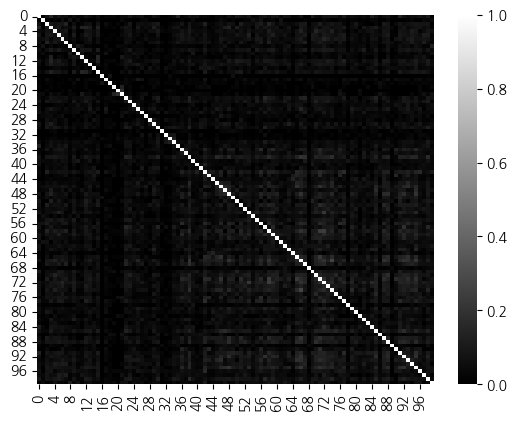

In [ ]:
# heatmap (속도가 오래 걸리니 100*100 정도를 추천합니다.)

# 밝은 색일수록 유사도가 높음

sns.heatmap(jaccard_sim[:100, :100], cmap="gray")

In [ ]:
find_similarity_idx(25, jaccard_sim)

,번호,제목,similarity_25
25,2620,아파트 태양광 설치 및 에너지절약 활성화 포럼,1.000000
2441,204,서울시 전자우편 문의하려면?,0.150943
391,2254,"[강남구] 기술자문단(건축,재건축) 담당자 전화번호",0.142857
66,2579,목재감성 체험 박람회 (서울 목공 한마당),0.138462
2439,206,현재 서울시 시내버스 노선수 및 운행대수는?,0.115385
2221,424,측량업 폐업 신고 문의,0.111111
2509,136,서울시 투자사업심사에 관한 규칙 열람,0.111111
2443,202,외국도시와 자매도시 맺은 현황 및 절차는?,0.106667
280,2365,환이랑 경이랑 함께 가꾸는 초록서울,0.106383
2477,168,서울시 차량통행속도조사 결과자료는 어디에서 얻을 수 있나요?,0.104167
